In [134]:
#Importando as bibliotecas
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io as sc
import pandas as pd
import pymatreader as pytomat
from pymatreader import read_mat

In [135]:
#Comando para leitura de dados .mat mas que não funciona com os dados de acelerôemtro (OBSOLETA)
# mat = sc.loadmat('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\LRV4306\\gps_data\\25126_20151210_3_2_7_2gps.mat')
# mat['save_var_gps']
# df_teste = pd.DataFrame(mat['save_var_gps'])

In [136]:
#Visualizando os dados do acelerômetro

dataacer = read_mat('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\LRV4306\\accelerometer_data\\39_20131121_1_1_5_1_3.mat')
pd.DataFrame(dataacer)

,save_var
0,0.313770
1,0.123914
2,0.009619
3,0.170537
4,0.132229
...,...
865442,0.172725
865443,0.127627
865444,0.201840
865445,0.342721


In [137]:
#Comando para criação de dataframe com os dados de GPS
datagps = read_mat('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\LRV4313\\gps_data\\409_20150618_3_1_5_2gps.mat')
pd.DataFrame(datagps['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])

,Longitude,Latitude,Altitude,Velocity,Time_Stamp
0,-80.019933,40.365635,323.4,49.6,736126.952870
1,-80.019770,40.365652,323.2,48.6,736126.952882
2,-80.019610,40.365668,323.0,49.6,736126.952894
3,-80.019450,40.365682,322.9,48.9,736126.952905
4,-80.019297,40.365697,322.3,47.0,736126.952917
...,...,...,...,...,...
537,-80.002412,40.406373,302.2,63.9,736126.959086
538,-80.002515,40.406512,302.7,65.4,736126.959097
539,-80.002613,40.406648,303.3,62.0,736126.959109
540,-80.002700,40.406785,303.8,61.3,736126.959120


In [138]:
#Comando para listar arquivos do diretório
print(os.listdir('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train' ))
#\\ground_truth_rail_layout_GPS

['regions.fig', 'README.txt', 'regions.pdf', 'code', 'ground_truth_rail_layout_GPS', 'LRV4306', 'LRV4313', 'track_maintenance_logs', 'README_updated.txt']


In [139]:
#comando do Samuel para listar os arquivos da região 5
# diretory=['LRV4306\\accelerometer_data','LRV4306\\gps_data','LRV4313\\gps_data','LRV4313\\accelerometer_data']
# for i in range(0, len(diretory)-1):
#    files=os.listdir('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\'+diretory[3])
#    for j in range(0,len(files)-1):
#        name=files[j].split("_")
#        if name[4]=='5' and name != 'desktop.ini':
#            print(name)

In [140]:
#Criando o Dataframe global com os dados de acelerômetro
trem = ['LRV4306','LRV4313']
path = 'G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\'
df_global = pd.DataFrame()

diretory=['LRV4306\\accelerometer_data', 'LRV4313\\accelerometer_data']
for i in range(0, len(diretory)):
    files=os.listdir(path+diretory[i])
    for j in range(0,len(files)-1):
        name=files[j].split("_")
        if name[4]=='5' and name != 'desktop.ini':
            file = int(name[0])
            date = int(name[1])
            root_index = int(name[2])
            daily_passing = int(name[3])
            region = int(name[4])
            running_direction = int(name[5])
            accelerometer = int(name[6].split(".mat")[0])
            arquivo = diretory[i]+'\\'+files[j]
            identidade = str(date) + '_' +str(root_index)+ '_' +str(daily_passing) +'_'+str(region)+'_'+str(running_direction)
            df_global = pd.concat([df_global, pd.DataFrame({'trem': [trem[i]], 'file': [file], 'date': [date],'root_index': [root_index],
                     'daily_passing': [daily_passing], 'region': [region], 'running_direction': [running_direction], 'accelerometer': accelerometer, 'arquivo': arquivo, 'identidade': identidade})], ignore_index = True)

In [141]:
#acrescentando os dados de GPS também, mas colocando valor negativo na posição do acelerômetro pra representar valor nulo
accelerometer = -1
#df_global = pd.DataFrame()

diretory=['LRV4306\\gps_data','LRV4313\\gps_data']
for i in range(0, len(diretory)):
    files=os.listdir(path+diretory[i])
    for j in range(0,len(files)-1):
        name=files[j].split("_")
        if name[4]=='5' and name != 'desktop.ini':
            file = int(name[0])
            date = int(name[1])
            root_index = int(name[2])
            daily_passing = int(name[3])
            region = int(name[4])
            running_direction = int(name[5].split("gps")[0])
            arquivo = diretory[i]+'\\'+files[j]
            identidade = str(date) + '_' +str(root_index)+ '_' +str(daily_passing) +'_'+str(region)+'_'+str(running_direction)
            df_global = pd.concat([df_global, pd.DataFrame({'trem': [trem[i]], 'file': [file], 'date': [date],'root_index': [root_index],
                     'daily_passing': [daily_passing], 'region': [region], 'running_direction': [running_direction], 'accelerometer': accelerometer, 'arquivo': arquivo, 'identidade': identidade})], ignore_index = True)

In [142]:
df_global=df_global.sort_values(by=['file']).reset_index(drop=True)
df_global=df_global.loc[(df_global.trem=='LRV4306') & (df_global.running_direction==1) & (df_global.accelerometer<6)]

In [143]:
df_global.loc[df_global.accelerometer == -1]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
0,LRV4306,36,20131121,1,1,5,1,-1,LRV4306\gps_data\36_20131121_1_1_5_1gps.mat,20131121_1_1_5_1
45,LRV4306,136,20131121,5,1,5,1,-1,LRV4306\gps_data\136_20131121_5_1_5_1gps.mat,20131121_5_1_5_1
74,LRV4306,201,20131227,4,1,5,1,-1,LRV4306\gps_data\201_20131227_4_1_5_1gps.mat,20131227_4_1_5_1
120,LRV4306,266,20131227,4,2,5,1,-1,LRV4306\gps_data\266_20131227_4_2_5_1gps.mat,20131227_4_2_5_1
166,LRV4306,346,20131227,6,1,5,1,-1,LRV4306\gps_data\346_20131227_6_1_5_1gps.mat,20131227_6_1_5_1
...,...,...,...,...,...,...,...,...,...,...
5643,LRV4306,29856,20160505,3,6,5,1,-1,LRV4306\gps_data\29856_20160505_3_6_5_1gps.mat,20160505_3_6_5_1
5645,LRV4306,29901,20160519,1,1,5,1,-1,LRV4306\gps_data\29901_20160519_1_1_5_1gps.mat,20160519_1_1_5_1
5647,LRV4306,29961,20160519,1,2,5,1,-1,LRV4306\gps_data\29961_20160519_1_2_5_1gps.mat,20160519_1_2_5_1
5649,LRV4306,30016,20160519,2,1,5,1,-1,LRV4306\gps_data\30016_20160519_2_1_5_1gps.mat,20160519_2_1_5_1


2 12
23 14
4 17
14 21
6 27
18 38
15 76
39 109
9 118
15 119
2 142
9 163
30 202
31 220
2 263
26 267
35 268
31 271
2 284
4 287
2 308


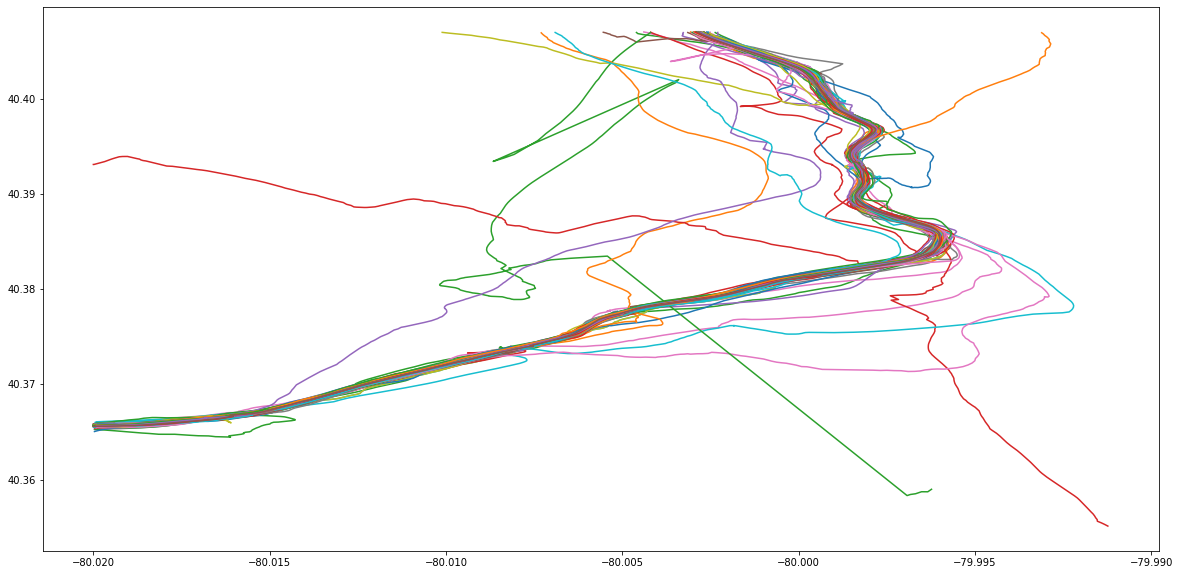

<Figure size 1440x720 with 0 Axes>

In [144]:
for j in [1,2]:
    aux = df_global.loc[(df_global['trem'] == 'LRV4306') & (df_global['accelerometer'] == -1)
                                 & (df_global['running_direction'] == j)].reset_index(drop=True)

    plt.figure(figsize=[20,10])
    x = pd.DataFrame()
    y = pd.DataFrame()

    for i in range(0, len(aux)):
        #print(aux[i])
        df_gps = pd.DataFrame(read_mat(path+aux.arquivo[i])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
        x = df_gps.Longitude
        y = df_gps.Latitude
        if(len(x) < 75 or len(y) < 75):
            print(str(len(x)) + ' ' + str(i))
            df_global.drop(df_global[df_global.identidade == aux.identidade[i]].index,  inplace=True)
        else:
            plt.plot(x,y)

### Observações sobre dados de GPS:

##### Os dados de GPS (e provavelmente o de acelerômetro também) não possuem a mesma quantidade de linhas, de modo que a comparação da posição 10 de longitude e latitude de arquivos diferentes, por exemplo, não necessariamente correspondem a mesma posição. Desse modo, a aquisição do trajeto por meio de simples artifícios estatísticos como média, mediana e moda não funcionam.

##### Um outro ponto é que alguns dados de gps (e provavelmente pode ocorrer com o de acelerômetro também) possuem poucos registros, por exemplo dois pontos apenas de longitude e latitude. Essa falta de dados torna inutilizável o arquivo. Sendo assim, estes devem ser excluídos. Por coincidência, alguns desses são outliers. Mas ainda há outliers a serem tratados.

###### Dica: Analisar dados outbound separados do inbound a priori.

Removendo arquivos que não apresentam todos os sensores de acelerômetros

In [145]:
aux = df_global.loc[(df_global['trem'] == 'LRV4306') & (df_global['accelerometer'] == -1)
                        & (df_global['running_direction'] == 1)].reset_index(drop=True)
count=0
for i in range(0,len(aux)):
    if len(df_global[df_global.identidade == aux.identidade[i]])<6:
        print(aux.identidade[i])
        df_global.drop(df_global[df_global.identidade == aux.identidade[i]].index,  inplace=True)
        count=count+1
count

20140411_7_1_5_1
20140418_2_1_5_1
20140418_3_1_5_1
20140418_9_2_5_1
20160121_9_2_5_1
20160128_2_1_5_1
20160128_2_2_5_1
20160128_4_1_5_1
20160128_4_2_5_1
20160128_4_3_5_1
20160324_1_1_5_1
20160324_1_2_5_1
20160324_7_1_5_1
20160324_7_2_5_1
20160324_8_1_5_1
20160324_8_2_5_1
20160324_8_3_5_1
20160408_6_1_5_1
20160408_6_2_5_1
20160414_5_1_5_1
20160414_5_2_5_1
20160414_5_3_5_1
20160414_5_4_5_1
20160414_5_5_5_1
20160414_5_6_5_1
20160414_6_1_5_1
20160414_6_2_5_1
20160505_2_1_5_1
20160505_2_2_5_1
20160505_2_3_5_1
20160505_2_4_5_1
20160505_3_1_5_1
20160505_3_3_5_1
20160505_3_4_5_1
20160505_3_5_5_1
20160505_3_6_5_1
20160519_1_1_5_1
20160519_1_2_5_1
20160519_2_1_5_1
20160519_2_2_5_1


40

In [226]:
df_global.loc[df_global.accelerometer == -1].sort_values('date').reset_index(drop=True)

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
0,LRV4306,36,20131121,1,1,5,1,-1,LRV4306\gps_data\36_20131121_1_1_5_1gps.mat,20131121_1_1_5_1
1,LRV4306,136,20131121,5,1,5,1,-1,LRV4306\gps_data\136_20131121_5_1_5_1gps.mat,20131121_5_1_5_1
2,LRV4306,201,20131227,4,1,5,1,-1,LRV4306\gps_data\201_20131227_4_1_5_1gps.mat,20131227_4_1_5_1
3,LRV4306,266,20131227,4,2,5,1,-1,LRV4306\gps_data\266_20131227_4_2_5_1gps.mat,20131227_4_2_5_1
4,LRV4306,346,20131227,6,1,5,1,-1,LRV4306\gps_data\346_20131227_6_1_5_1gps.mat,20131227_6_1_5_1
...,...,...,...,...,...,...,...,...,...,...
240,LRV4306,27241,20160114,3,1,5,1,-1,LRV4306\gps_data\27241_20160114_3_1_5_1gps.mat,20160114_3_1_5_1
241,LRV4306,27301,20160114,3,2,5,1,-1,LRV4306\gps_data\27301_20160114_3_2_5_1gps.mat,20160114_3_2_5_1
242,LRV4306,26831,20160114,7,2,5,1,-1,LRV4306\gps_data\26831_20160114_7_2_5_1gps.mat,20160114_7_2_5_1
243,LRV4306,26916,20160114,8,1,5,1,-1,LRV4306\gps_data\26916_20160114_8_1_5_1gps.mat,20160114_8_1_5_1


Alinhando os dados de GPS

In [147]:
from dtwalign import dtw

In [148]:
df_gps_inbound = pd.read_csv('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\ground_truth_rail_layout_GPS\\region5_inbound.csv', sep=',',
                         names=['dist', 'latit', 'longit'])


df_gps_outbound = pd.read_csv('G:\\.shortcut-targets-by-id\\1oKn7IN7zznQuhwjDCDdjq8r9wHJYBEhj\\DR_Train\\ground_truth_rail_layout_GPS\\region5_outbound.csv', sep=',',
                         names=['dist', 'latit', 'longit'])

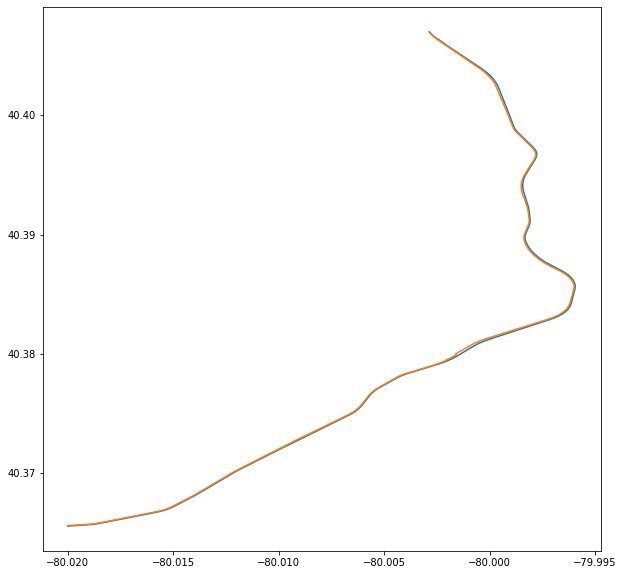

In [149]:
#Verificando inbound e outbound
x_in = df_gps_inbound.longit
y_in = df_gps_inbound.latit
x_out = df_gps_outbound.longit
y_out = df_gps_outbound.latit
plt.figure(figsize=[10,10])
plt.plot(x_in,y_in)
plt.plot(x_out,y_out)

In [150]:
#GPS=pd.DataFrame(read_mat(path+df_global.arquivo[4821])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
#plt.plot(GPS.Longitude,GPS.Latitude)

In [151]:
resx = dtw(GPS.Longitude, x_out)
resy = dtw(GPS.Latitude, y_out)
resx.distance

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:81: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if x.ndim == 1: x = x[:, np.newaxis]
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:82: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if y.ndim == 1: y = y[:, np.newaxis]


0.40678489999622514

In [152]:
resy.distance

0.5326743999986405

In [153]:
x_warping_path = resx.get_warping_path(target="query")
x_warping_path

array([  0,   0,   0, ..., 454, 454, 454], dtype=int64)

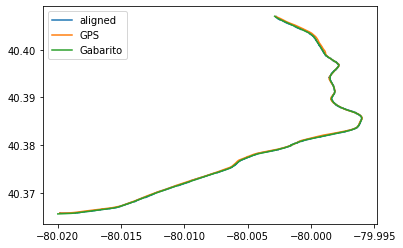

In [154]:
plt.plot(GPS.Longitude[resx.get_warping_path(target="query")],GPS.Latitude[resy.get_warping_path(target="query")], label="aligned")
#plt.plot(x_out,y_out, label='Referencia')
plt.plot(GPS.Longitude,GPS.Latitude, label='GPS')
plt.plot(x_out,y_out, label='Gabarito')
#plt.plot(resx.get_warping_path(target="query"), y_out, label='Ajuste')
plt.legend()

In [155]:
distance=[]
aux = df_global.loc[(df_global['trem'] == 'LRV4306') & (df_global['accelerometer'] == -1)
                        & (df_global['running_direction'] == 1)].reset_index(drop=True)

for i in range(0, len(aux)):
    df_gps = pd.DataFrame(read_mat(path+aux.arquivo[i])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
    resx = dtw(df_gps.Longitude, x_out).distance
    resy = dtw(df_gps.Latitude, y_out).distance
    distance.append((resx**2+resy**2)**0.5)
    

c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:81: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if x.ndim == 1: x = x[:, np.newaxis]
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:82: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if y.ndim == 1: y = y[:, np.newaxis]
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib\site-packages\dtwalign\dtw.py:81: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if x.ndim == 1: x = x[:, np.newaxis]
c:\Users\samue\AppData\Local\Programs\Python\Python310\lib

In [156]:
#plt.plot(GPS.Longitude[resx.get_warping_path(target="query")],GPS.Latitude[resy.get_warping_path(target="query")])

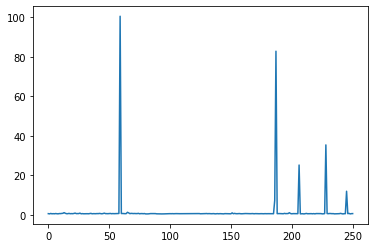

In [157]:
plt.plot(distance) 

In [158]:
for i in range(0,len(distance)):
    if distance[i]>10:
        print(aux.arquivo[i])
        df_global.drop(df_global[df_global.identidade == aux.identidade[i]].index,  inplace=True)


LRV4306\gps_data\9036_20140711_4_2_5_1gps.mat
LRV4306\gps_data\20406_20150730_5_1_5_1gps.mat
LRV4306\gps_data\22691_20151001_9_1_5_1gps.mat
LRV4306\gps_data\24341_20151210_3_4_5_1gps.mat
LRV4306\gps_data\26771_20160114_7_1_5_1gps.mat


In [159]:
df_global.loc[df_global.accelerometer == -1]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
0,LRV4306,36,20131121,1,1,5,1,-1,LRV4306\gps_data\36_20131121_1_1_5_1gps.mat,20131121_1_1_5_1
45,LRV4306,136,20131121,5,1,5,1,-1,LRV4306\gps_data\136_20131121_5_1_5_1gps.mat,20131121_5_1_5_1
74,LRV4306,201,20131227,4,1,5,1,-1,LRV4306\gps_data\201_20131227_4_1_5_1gps.mat,20131227_4_1_5_1
120,LRV4306,266,20131227,4,2,5,1,-1,LRV4306\gps_data\266_20131227_4_2_5_1gps.mat,20131227_4_2_5_1
166,LRV4306,346,20131227,6,1,5,1,-1,LRV4306\gps_data\346_20131227_6_1_5_1gps.mat,20131227_6_1_5_1
...,...,...,...,...,...,...,...,...,...,...
5485,LRV4306,26831,20160114,7,2,5,1,-1,LRV4306\gps_data\26831_20160114_7_2_5_1gps.mat,20160114_7_2_5_1
5503,LRV4306,26916,20160114,8,1,5,1,-1,LRV4306\gps_data\26916_20160114_8_1_5_1gps.mat,20160114_8_1_5_1
5515,LRV4306,27241,20160114,3,1,5,1,-1,LRV4306\gps_data\27241_20160114_3_1_5_1gps.mat,20160114_3_1_5_1
5527,LRV4306,27301,20160114,3,2,5,1,-1,LRV4306\gps_data\27301_20160114_3_2_5_1gps.mat,20160114_3_2_5_1


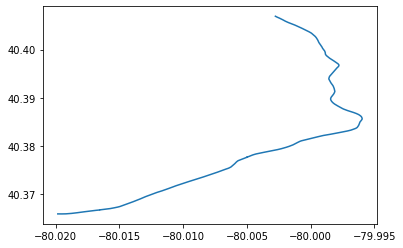

In [160]:
#abrindo um dado de GPS escolhido arbitráriamente
GPS=pd.DataFrame(read_mat(path+df_global.arquivo[5485])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
plt.plot(GPS.Longitude,GPS.Latitude)

In [161]:
#dado de acelerômetro correspondente ao dado de GPS aberto
nomeacc = df_global.loc[(df_global['identidade'] == df_global.identidade[5485]) & (df_global['file'] == 26832), 'arquivo'].reset_index(drop=True)
dataacer = read_mat(path+nomeacc[0])
df_acc = pd.DataFrame(dataacer)
df_acc

,save_var
0,-0.045267
1,-0.030098
2,0.013356
3,0.024190
4,0.003554
...,...
749828,-0.042076
749829,0.008488
749830,-0.033466
749831,-0.065576


In [162]:
#criando uma matriz generalizada contendo GPS e Acc, sendo que os de GPS são posto a cada 1647 dados de acc e o resto é NaN.
df_concatenado = pd.DataFrame()
df_concatenado = pd.concat([GPS.iloc[:1, ], df_acc[:1647]], axis=1)
for i in range(1, int(len(df_acc)/1647)+1):
    df_concatenado = df_concatenado.append(pd.concat([GPS.iloc[i:i+1, ].reset_index(drop=True), df_acc[i*1647:(i+1)*1647].reset_index(drop=True)], axis=1)).reset_index(drop=True)

C:\Users\samue\AppData\Local\Temp\ipykernel_916\1579311887.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concatenado = df_concatenado.append(pd.concat([GPS.iloc[i:i+1, ].reset_index(drop=True), df_acc[i*1647:(i+1)*1647].reset_index(drop=True)], axis=1)).reset_index(drop=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_916\1579311887.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concatenado = df_concatenado.append(pd.concat([GPS.iloc[i:i+1, ].reset_index(drop=True), df_acc[i*1647:(i+1)*1647].reset_index(drop=True)], axis=1)).reset_index(drop=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_916\1579311887.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concatenado = df_concatenado.append(pd.concat([

In [163]:
#Interpolando o df para substituir os NaN por valores interpolados.
df_concatenado = df_concatenado.interpolate(method ='linear', limit_direction ='forward')

Unindo todos os bancos de dados

In [204]:
df_global.reset_index(drop=True)

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
0,LRV4306,36,20131121,1,1,5,1,-1,LRV4306\gps_data\36_20131121_1_1_5_1gps.mat,20131121_1_1_5_1
1,LRV4306,37,20131121,1,1,5,1,1,LRV4306\accelerometer_data\37_20131121_1_1_5_1...,20131121_1_1_5_1
2,LRV4306,38,20131121,1,1,5,1,2,LRV4306\accelerometer_data\38_20131121_1_1_5_1...,20131121_1_1_5_1
3,LRV4306,39,20131121,1,1,5,1,3,LRV4306\accelerometer_data\39_20131121_1_1_5_1...,20131121_1_1_5_1
4,LRV4306,40,20131121,1,1,5,1,4,LRV4306\accelerometer_data\40_20131121_1_1_5_1...,20131121_1_1_5_1
...,...,...,...,...,...,...,...,...,...,...
1675,LRV4306,27357,20160121,9,1,5,1,1,LRV4306\accelerometer_data\27357_20160121_9_1_...,20160121_9_1_5_1
1676,LRV4306,27358,20160121,9,1,5,1,2,LRV4306\accelerometer_data\27358_20160121_9_1_...,20160121_9_1_5_1
1677,LRV4306,27359,20160121,9,1,5,1,3,LRV4306\accelerometer_data\27359_20160121_9_1_...,20160121_9_1_5_1
1678,LRV4306,27360,20160121,9,1,5,1,4,LRV4306\accelerometer_data\27360_20160121_9_1_...,20160121_9_1_5_1


Os acererômetros do dia 20150618, 20160421, 20160505, 20160519, 20150625, 20150924, 20151022, 20151029, 20151105, 20150818 não têm arquivo gps associado:

In [255]:
df_global.loc[df_global.date == 20150618]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
28,LRV4306,129,20150618,1,2,5,1,1,LRV4306\accelerometer_data\129_20150618_1_2_5_...,20150618_1_2_5_1
32,LRV4306,130,20150618,1,2,5,1,2,LRV4306\accelerometer_data\130_20150618_1_2_5_...,20150618_1_2_5_1
34,LRV4306,131,20150618,1,2,5,1,3,LRV4306\accelerometer_data\131_20150618_1_2_5_...,20150618_1_2_5_1
36,LRV4306,132,20150618,1,2,5,1,4,LRV4306\accelerometer_data\132_20150618_1_2_5_...,20150618_1_2_5_1
37,LRV4306,133,20150618,1,2,5,1,5,LRV4306\accelerometer_data\133_20150618_1_2_5_...,20150618_1_2_5_1
86,LRV4306,217,20150618,1,3,5,1,1,LRV4306\accelerometer_data\217_20150618_1_3_5_...,20150618_1_3_5_1
89,LRV4306,218,20150618,1,3,5,1,2,LRV4306\accelerometer_data\218_20150618_1_3_5_...,20150618_1_3_5_1
92,LRV4306,219,20150618,1,3,5,1,3,LRV4306\accelerometer_data\219_20150618_1_3_5_...,20150618_1_3_5_1
93,LRV4306,220,20150618,1,3,5,1,4,LRV4306\accelerometer_data\220_20150618_1_3_5_...,20150618_1_3_5_1
96,LRV4306,221,20150618,1,3,5,1,5,LRV4306\accelerometer_data\221_20150618_1_3_5_...,20150618_1_3_5_1


In [258]:
df_global.loc[(df_global.date == 20160421)]


,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
2715,LRV4306,10065,20160421,3,1,5,1,1,LRV4306\accelerometer_data\10065_20160421_3_1_...,20160421_3_1_5_1
2719,LRV4306,10066,20160421,3,1,5,1,2,LRV4306\accelerometer_data\10066_20160421_3_1_...,20160421_3_1_5_1
2720,LRV4306,10067,20160421,3,1,5,1,3,LRV4306\accelerometer_data\10067_20160421_3_1_...,20160421_3_1_5_1
2722,LRV4306,10068,20160421,3,1,5,1,4,LRV4306\accelerometer_data\10068_20160421_3_1_...,20160421_3_1_5_1
2725,LRV4306,10069,20160421,3,1,5,1,5,LRV4306\accelerometer_data\10069_20160421_3_1_...,20160421_3_1_5_1
2762,LRV4306,10161,20160421,4,1,5,1,1,LRV4306\accelerometer_data\10161_20160421_4_1_...,20160421_4_1_5_1
2765,LRV4306,10162,20160421,4,1,5,1,2,LRV4306\accelerometer_data\10162_20160421_4_1_...,20160421_4_1_5_1
2767,LRV4306,10163,20160421,4,1,5,1,3,LRV4306\accelerometer_data\10163_20160421_4_1_...,20160421_4_1_5_1
2769,LRV4306,10164,20160421,4,1,5,1,4,LRV4306\accelerometer_data\10164_20160421_4_1_...,20160421_4_1_5_1
2770,LRV4306,10165,20160421,4,1,5,1,5,LRV4306\accelerometer_data\10165_20160421_4_1_...,20160421_4_1_5_1


In [263]:
df_global.loc[(df_global.date == 20160505)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
2906,LRV4306,10457,20160505,1,1,5,1,1,LRV4306\accelerometer_data\10457_20160505_1_1_...,20160505_1_1_5_1
2909,LRV4306,10458,20160505,1,1,5,1,2,LRV4306\accelerometer_data\10458_20160505_1_1_...,20160505_1_1_5_1
2911,LRV4306,10459,20160505,1,1,5,1,3,LRV4306\accelerometer_data\10459_20160505_1_1_...,20160505_1_1_5_1
2914,LRV4306,10460,20160505,1,1,5,1,4,LRV4306\accelerometer_data\10460_20160505_1_1_...,20160505_1_1_5_1
2916,LRV4306,10461,20160505,1,1,5,1,5,LRV4306\accelerometer_data\10461_20160505_1_1_...,20160505_1_1_5_1
2954,LRV4306,10593,20160505,5,1,5,1,1,LRV4306\accelerometer_data\10593_20160505_5_1_...,20160505_5_1_5_1
2956,LRV4306,10594,20160505,5,1,5,1,2,LRV4306\accelerometer_data\10594_20160505_5_1_...,20160505_5_1_5_1
2958,LRV4306,10595,20160505,5,1,5,1,3,LRV4306\accelerometer_data\10595_20160505_5_1_...,20160505_5_1_5_1
2960,LRV4306,10596,20160505,5,1,5,1,4,LRV4306\accelerometer_data\10596_20160505_5_1_...,20160505_5_1_5_1
2961,LRV4306,10597,20160505,5,1,5,1,5,LRV4306\accelerometer_data\10597_20160505_5_1_...,20160505_5_1_5_1


In [267]:
df_global.loc[(df_global.date == 20160519)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
3344,LRV4306,11369,20160519,3,1,5,1,1,LRV4306\accelerometer_data\11369_20160519_3_1_...,20160519_3_1_5_1
3347,LRV4306,11370,20160519,3,1,5,1,2,LRV4306\accelerometer_data\11370_20160519_3_1_...,20160519_3_1_5_1
3349,LRV4306,11371,20160519,3,1,5,1,3,LRV4306\accelerometer_data\11371_20160519_3_1_...,20160519_3_1_5_1
3351,LRV4306,11372,20160519,3,1,5,1,4,LRV4306\accelerometer_data\11372_20160519_3_1_...,20160519_3_1_5_1
3353,LRV4306,11373,20160519,3,1,5,1,5,LRV4306\accelerometer_data\11373_20160519_3_1_...,20160519_3_1_5_1
3391,LRV4306,11465,20160519,3,2,5,1,1,LRV4306\accelerometer_data\11465_20160519_3_2_...,20160519_3_2_5_1
3393,LRV4306,11466,20160519,3,2,5,1,2,LRV4306\accelerometer_data\11466_20160519_3_2_...,20160519_3_2_5_1
3395,LRV4306,11467,20160519,3,2,5,1,3,LRV4306\accelerometer_data\11467_20160519_3_2_...,20160519_3_2_5_1
3397,LRV4306,11468,20160519,3,2,5,1,4,LRV4306\accelerometer_data\11468_20160519_3_2_...,20160519_3_2_5_1
3399,LRV4306,11469,20160519,3,2,5,1,5,LRV4306\accelerometer_data\11469_20160519_3_2_...,20160519_3_2_5_1


In [280]:
df_global.loc[(df_global.date == 20150625)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
303,LRV4306,1161,20150625,3,1,5,1,1,LRV4306\accelerometer_data\1161_20150625_3_1_5...,20150625_3_1_5_1
305,LRV4306,1162,20150625,3,1,5,1,2,LRV4306\accelerometer_data\1162_20150625_3_1_5...,20150625_3_1_5_1
308,LRV4306,1163,20150625,3,1,5,1,3,LRV4306\accelerometer_data\1163_20150625_3_1_5...,20150625_3_1_5_1
310,LRV4306,1164,20150625,3,1,5,1,4,LRV4306\accelerometer_data\1164_20150625_3_1_5...,20150625_3_1_5_1
311,LRV4306,1165,20150625,3,1,5,1,5,LRV4306\accelerometer_data\1165_20150625_3_1_5...,20150625_3_1_5_1
350,LRV4306,1265,20150625,3,2,5,1,1,LRV4306\accelerometer_data\1265_20150625_3_2_5...,20150625_3_2_5_1
351,LRV4306,1266,20150625,3,2,5,1,2,LRV4306\accelerometer_data\1266_20150625_3_2_5...,20150625_3_2_5_1
353,LRV4306,1267,20150625,3,2,5,1,3,LRV4306\accelerometer_data\1267_20150625_3_2_5...,20150625_3_2_5_1
355,LRV4306,1268,20150625,3,2,5,1,4,LRV4306\accelerometer_data\1268_20150625_3_2_5...,20150625_3_2_5_1
357,LRV4306,1269,20150625,3,2,5,1,5,LRV4306\accelerometer_data\1269_20150625_3_2_5...,20150625_3_2_5_1


In [295]:
df_global.loc[(df_global.date == 20150924)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
804,LRV4306,2377,20150924,2,1,5,1,1,LRV4306\accelerometer_data\2377_20150924_2_1_5...,20150924_2_1_5_1
806,LRV4306,2378,20150924,2,1,5,1,2,LRV4306\accelerometer_data\2378_20150924_2_1_5...,20150924_2_1_5_1
808,LRV4306,2379,20150924,2,1,5,1,3,LRV4306\accelerometer_data\2379_20150924_2_1_5...,20150924_2_1_5_1
810,LRV4306,2380,20150924,2,1,5,1,4,LRV4306\accelerometer_data\2380_20150924_2_1_5...,20150924_2_1_5_1
812,LRV4306,2381,20150924,2,1,5,1,5,LRV4306\accelerometer_data\2381_20150924_2_1_5...,20150924_2_1_5_1
838,LRV4306,2481,20150924,2,2,5,1,1,LRV4306\accelerometer_data\2481_20150924_2_2_5...,20150924_2_2_5_1
839,LRV4306,2482,20150924,2,2,5,1,2,LRV4306\accelerometer_data\2482_20150924_2_2_5...,20150924_2_2_5_1
841,LRV4306,2483,20150924,2,2,5,1,3,LRV4306\accelerometer_data\2483_20150924_2_2_5...,20150924_2_2_5_1
844,LRV4306,2484,20150924,2,2,5,1,4,LRV4306\accelerometer_data\2484_20150924_2_2_5...,20150924_2_2_5_1
845,LRV4306,2485,20150924,2,2,5,1,5,LRV4306\accelerometer_data\2485_20150924_2_2_5...,20150924_2_2_5_1


In [317]:
df_global.loc[(df_global.date == 20151022)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
953,LRV4306,2937,20151022,2,1,5,1,1,LRV4306\accelerometer_data\2937_20151022_2_1_5...,20151022_2_1_5_1
955,LRV4306,2938,20151022,2,1,5,1,2,LRV4306\accelerometer_data\2938_20151022_2_1_5...,20151022_2_1_5_1
957,LRV4306,2939,20151022,2,1,5,1,3,LRV4306\accelerometer_data\2939_20151022_2_1_5...,20151022_2_1_5_1
959,LRV4306,2940,20151022,2,1,5,1,4,LRV4306\accelerometer_data\2940_20151022_2_1_5...,20151022_2_1_5_1
961,LRV4306,2941,20151022,2,1,5,1,5,LRV4306\accelerometer_data\2941_20151022_2_1_5...,20151022_2_1_5_1
987,LRV4306,3049,20151022,3,1,5,1,1,LRV4306\accelerometer_data\3049_20151022_3_1_5...,20151022_3_1_5_1
989,LRV4306,3050,20151022,3,1,5,1,2,LRV4306\accelerometer_data\3050_20151022_3_1_5...,20151022_3_1_5_1
991,LRV4306,3051,20151022,3,1,5,1,3,LRV4306\accelerometer_data\3051_20151022_3_1_5...,20151022_3_1_5_1
993,LRV4306,3052,20151022,3,1,5,1,4,LRV4306\accelerometer_data\3052_20151022_3_1_5...,20151022_3_1_5_1
995,LRV4306,3053,20151022,3,1,5,1,5,LRV4306\accelerometer_data\3053_20151022_3_1_5...,20151022_3_1_5_1


In [326]:
df_global.loc[(df_global.date == 20151022)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
953,LRV4306,2937,20151022,2,1,5,1,1,LRV4306\accelerometer_data\2937_20151022_2_1_5...,20151022_2_1_5_1
955,LRV4306,2938,20151022,2,1,5,1,2,LRV4306\accelerometer_data\2938_20151022_2_1_5...,20151022_2_1_5_1
957,LRV4306,2939,20151022,2,1,5,1,3,LRV4306\accelerometer_data\2939_20151022_2_1_5...,20151022_2_1_5_1
959,LRV4306,2940,20151022,2,1,5,1,4,LRV4306\accelerometer_data\2940_20151022_2_1_5...,20151022_2_1_5_1
961,LRV4306,2941,20151022,2,1,5,1,5,LRV4306\accelerometer_data\2941_20151022_2_1_5...,20151022_2_1_5_1
987,LRV4306,3049,20151022,3,1,5,1,1,LRV4306\accelerometer_data\3049_20151022_3_1_5...,20151022_3_1_5_1
989,LRV4306,3050,20151022,3,1,5,1,2,LRV4306\accelerometer_data\3050_20151022_3_1_5...,20151022_3_1_5_1
991,LRV4306,3051,20151022,3,1,5,1,3,LRV4306\accelerometer_data\3051_20151022_3_1_5...,20151022_3_1_5_1
993,LRV4306,3052,20151022,3,1,5,1,4,LRV4306\accelerometer_data\3052_20151022_3_1_5...,20151022_3_1_5_1
995,LRV4306,3053,20151022,3,1,5,1,5,LRV4306\accelerometer_data\3053_20151022_3_1_5...,20151022_3_1_5_1


In [329]:
df_global.loc[(df_global.date == 20151029)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
1055,LRV4306,3265,20151029,2,1,5,1,1,LRV4306\accelerometer_data\3265_20151029_2_1_5...,20151029_2_1_5_1
1056,LRV4306,3266,20151029,2,1,5,1,2,LRV4306\accelerometer_data\3266_20151029_2_1_5...,20151029_2_1_5_1
1059,LRV4306,3267,20151029,2,1,5,1,3,LRV4306\accelerometer_data\3267_20151029_2_1_5...,20151029_2_1_5_1
1061,LRV4306,3268,20151029,2,1,5,1,4,LRV4306\accelerometer_data\3268_20151029_2_1_5...,20151029_2_1_5_1
1063,LRV4306,3269,20151029,2,1,5,1,5,LRV4306\accelerometer_data\3269_20151029_2_1_5...,20151029_2_1_5_1
1090,LRV4306,3361,20151029,2,2,5,1,1,LRV4306\accelerometer_data\3361_20151029_2_2_5...,20151029_2_2_5_1
1092,LRV4306,3362,20151029,2,2,5,1,2,LRV4306\accelerometer_data\3362_20151029_2_2_5...,20151029_2_2_5_1
1094,LRV4306,3363,20151029,2,2,5,1,3,LRV4306\accelerometer_data\3363_20151029_2_2_5...,20151029_2_2_5_1
1096,LRV4306,3364,20151029,2,2,5,1,4,LRV4306\accelerometer_data\3364_20151029_2_2_5...,20151029_2_2_5_1
1099,LRV4306,3365,20151029,2,2,5,1,5,LRV4306\accelerometer_data\3365_20151029_2_2_5...,20151029_2_2_5_1


In [338]:
df_global.loc[(df_global.date == 20151105)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
1272,LRV4306,3809,20151105,1,1,5,1,1,LRV4306\accelerometer_data\3809_20151105_1_1_5...,20151105_1_1_5_1
1274,LRV4306,3810,20151105,1,1,5,1,2,LRV4306\accelerometer_data\3810_20151105_1_1_5...,20151105_1_1_5_1
1276,LRV4306,3811,20151105,1,1,5,1,3,LRV4306\accelerometer_data\3811_20151105_1_1_5...,20151105_1_1_5_1
1279,LRV4306,3812,20151105,1,1,5,1,4,LRV4306\accelerometer_data\3812_20151105_1_1_5...,20151105_1_1_5_1
1281,LRV4306,3813,20151105,1,1,5,1,5,LRV4306\accelerometer_data\3813_20151105_1_1_5...,20151105_1_1_5_1


In [422]:
df_global.loc[(df_global.date == 20150818)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
600,LRV4306,1849,20150818,2,1,5,1,1,LRV4306\accelerometer_data\1849_20150818_2_1_5...,20150818_2_1_5_1
603,LRV4306,1850,20150818,2,1,5,1,2,LRV4306\accelerometer_data\1850_20150818_2_1_5...,20150818_2_1_5_1
605,LRV4306,1851,20150818,2,1,5,1,3,LRV4306\accelerometer_data\1851_20150818_2_1_5...,20150818_2_1_5_1
608,LRV4306,1852,20150818,2,1,5,1,4,LRV4306\accelerometer_data\1852_20150818_2_1_5...,20150818_2_1_5_1
610,LRV4306,1853,20150818,2,1,5,1,5,LRV4306\accelerometer_data\1853_20150818_2_1_5...,20150818_2_1_5_1
658,LRV4306,1961,20150818,2,2,5,1,1,LRV4306\accelerometer_data\1961_20150818_2_2_5...,20150818_2_2_5_1
662,LRV4306,1962,20150818,2,2,5,1,2,LRV4306\accelerometer_data\1962_20150818_2_2_5...,20150818_2_2_5_1
664,LRV4306,1963,20150818,2,2,5,1,3,LRV4306\accelerometer_data\1963_20150818_2_2_5...,20150818_2_2_5_1
666,LRV4306,1964,20150818,2,2,5,1,4,LRV4306\accelerometer_data\1964_20150818_2_2_5...,20150818_2_2_5_1
668,LRV4306,1965,20150818,2,2,5,1,5,LRV4306\accelerometer_data\1965_20150818_2_2_5...,20150818_2_2_5_1


In [423]:
aux=df_global.loc[(df_global.date != 20150618)&(df_global.date != 20160421)&(df_global.date != 20160505)&(df_global.date != 20160519)&(df_global.date != 20150625)&(df_global.date != 20150924) &(df_global.date != 20151022)
                    &(df_global.date != 20151022)&(df_global.date != 20151029)&(df_global.date != 20151105) & (df_global.date != 20150818)]
aux=aux.reset_index(drop=True)
aux

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
0,LRV4306,36,20131121,1,1,5,1,-1,LRV4306\gps_data\36_20131121_1_1_5_1gps.mat,20131121_1_1_5_1
1,LRV4306,37,20131121,1,1,5,1,1,LRV4306\accelerometer_data\37_20131121_1_1_5_1...,20131121_1_1_5_1
2,LRV4306,38,20131121,1,1,5,1,2,LRV4306\accelerometer_data\38_20131121_1_1_5_1...,20131121_1_1_5_1
3,LRV4306,39,20131121,1,1,5,1,3,LRV4306\accelerometer_data\39_20131121_1_1_5_1...,20131121_1_1_5_1
4,LRV4306,40,20131121,1,1,5,1,4,LRV4306\accelerometer_data\40_20131121_1_1_5_1...,20131121_1_1_5_1
...,...,...,...,...,...,...,...,...,...,...
1465,LRV4306,27357,20160121,9,1,5,1,1,LRV4306\accelerometer_data\27357_20160121_9_1_...,20160121_9_1_5_1
1466,LRV4306,27358,20160121,9,1,5,1,2,LRV4306\accelerometer_data\27358_20160121_9_1_...,20160121_9_1_5_1
1467,LRV4306,27359,20160121,9,1,5,1,3,LRV4306\accelerometer_data\27359_20160121_9_1_...,20160121_9_1_5_1
1468,LRV4306,27360,20160121,9,1,5,1,4,LRV4306\accelerometer_data\27360_20160121_9_1_...,20160121_9_1_5_1


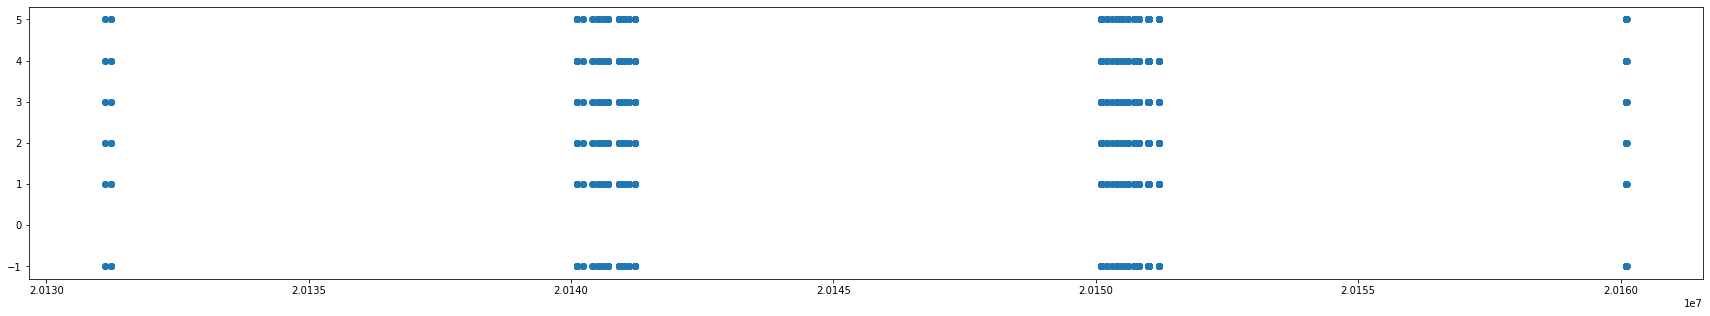

In [424]:
plt.figure(figsize=[30,5])
plt.scatter(aux.date,aux.accelerometer)
#plt.xlim(20131121,20160121)

In [412]:
aux.loc[(aux.accelerometer != -1) &(aux.accelerometer != 1) & (aux.accelerometer != 2) & (aux.accelerometer != 3) & (aux.accelerometer != 4) & (aux.accelerometer != 5)]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade


In [421]:
aux[80:100]

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
80,LRV4306,1618,20140124,2,1,5,1,2,LRV4306\accelerometer_data\1618_20140124_2_1_5...,20140124_2_1_5_1
81,LRV4306,1619,20140124,2,1,5,1,3,LRV4306\accelerometer_data\1619_20140124_2_1_5...,20140124_2_1_5_1
82,LRV4306,1620,20140124,2,1,5,1,4,LRV4306\accelerometer_data\1620_20140124_2_1_5...,20140124_2_1_5_1
83,LRV4306,1621,20140124,2,1,5,1,5,LRV4306\accelerometer_data\1621_20140124_2_1_5...,20140124_2_1_5_1
84,LRV4306,1756,20140124,7,1,5,1,-1,LRV4306\gps_data\1756_20140124_7_1_5_1gps.mat,20140124_7_1_5_1
85,LRV4306,1757,20140124,7,1,5,1,1,LRV4306\accelerometer_data\1757_20140124_7_1_5...,20140124_7_1_5_1
86,LRV4306,1758,20140124,7,1,5,1,2,LRV4306\accelerometer_data\1758_20140124_7_1_5...,20140124_7_1_5_1
87,LRV4306,1759,20140124,7,1,5,1,3,LRV4306\accelerometer_data\1759_20140124_7_1_5...,20140124_7_1_5_1
88,LRV4306,1760,20140124,7,1,5,1,4,LRV4306\accelerometer_data\1760_20140124_7_1_5...,20140124_7_1_5_1
89,LRV4306,1761,20140124,7,1,5,1,5,LRV4306\accelerometer_data\1761_20140124_7_1_5...,20140124_7_1_5_1


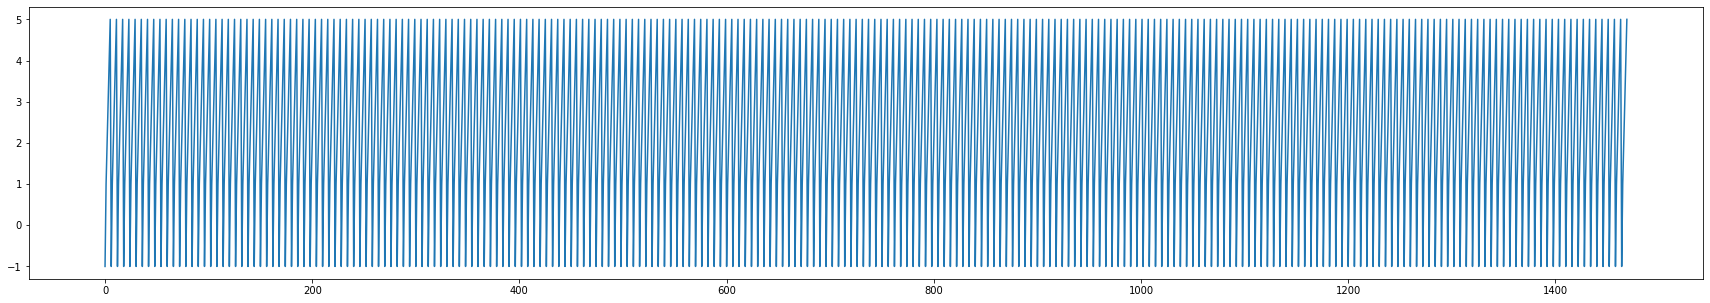

In [426]:
plt.figure(figsize=[30,5])
plt.plot(aux.index,aux.accelerometer)
#plt.xlim(90,200)

In [427]:
aux

,trem,file,date,root_index,daily_passing,region,running_direction,accelerometer,arquivo,identidade
0,LRV4306,36,20131121,1,1,5,1,-1,LRV4306\gps_data\36_20131121_1_1_5_1gps.mat,20131121_1_1_5_1
1,LRV4306,37,20131121,1,1,5,1,1,LRV4306\accelerometer_data\37_20131121_1_1_5_1...,20131121_1_1_5_1
2,LRV4306,38,20131121,1,1,5,1,2,LRV4306\accelerometer_data\38_20131121_1_1_5_1...,20131121_1_1_5_1
3,LRV4306,39,20131121,1,1,5,1,3,LRV4306\accelerometer_data\39_20131121_1_1_5_1...,20131121_1_1_5_1
4,LRV4306,40,20131121,1,1,5,1,4,LRV4306\accelerometer_data\40_20131121_1_1_5_1...,20131121_1_1_5_1
...,...,...,...,...,...,...,...,...,...,...
1465,LRV4306,27357,20160121,9,1,5,1,1,LRV4306\accelerometer_data\27357_20160121_9_1_...,20160121_9_1_5_1
1466,LRV4306,27358,20160121,9,1,5,1,2,LRV4306\accelerometer_data\27358_20160121_9_1_...,20160121_9_1_5_1
1467,LRV4306,27359,20160121,9,1,5,1,3,LRV4306\accelerometer_data\27359_20160121_9_1_...,20160121_9_1_5_1
1468,LRV4306,27360,20160121,9,1,5,1,4,LRV4306\accelerometer_data\27360_20160121_9_1_...,20160121_9_1_5_1


Ainda não funcionando: 

In [428]:
for i in range(0, len(aux.index)):
    id=aux.identidade[i]
    file=aux.file[i]
    df_gps = pd.DataFrame(read_mat(path+aux.arquivo[i])['save_var_gps'], columns=['Longitude', 'Latitude', 'Altitude', 'Velocity', 'Time_Stamp'])
    df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+1]), columns=[str(aux.accelerometer[i+1])])
    jump=int(len(df_acc)/len(df_gps))
    df_concatenado = pd.DataFrame()
    df_concatenado = pd.concat([GPS.iloc[:1, ], df_acc[:jump]], axis=1)
    for j in range(1, int(len(df_gps)+1)):
        df_concatenado = df_concatenado.append(pd.concat([GPS.iloc[j:j+1, ].reset_index(drop=True), df_acc[j*jump:(i+1)*jump].reset_index(drop=True)], axis=1)).reset_index(drop=True)
    df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+2]), columns=[aux.accelerometer[i+2]])
    if i==0:
        df_final=df_concatenado
    df_final=pd.concat([df_final, df_acc], axis=1)
    df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+3]), columns=[str(aux.accelerometer[i+3])])
    df_final=pd.concat([df_final, df_acc], axis=1)
    df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+4]), columns=[str(aux.accelerometer[i+4])])
    df_final=pd.concat([df_final, df_acc], axis=1)
    df_acc = pd.DataFrame(read_mat(path+aux.arquivo[i+5]), columns=[str(aux.accelerometer[i+5])])
    df_final=pd.concat([df_final, df_acc], axis=1)
    i=i+5

C:\Users\samue\AppData\Local\Temp\ipykernel_916\403124705.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concatenado = df_concatenado.append(pd.concat([GPS.iloc[j:j+1, ].reset_index(drop=True), df_acc[j*jump:(i+1)*jump].reset_index(drop=True)], axis=1)).reset_index(drop=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_916\403124705.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concatenado = df_concatenado.append(pd.concat([GPS.iloc[j:j+1, ].reset_index(drop=True), df_acc[j*jump:(i+1)*jump].reset_index(drop=True)], axis=1)).reset_index(drop=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_916\403124705.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concatenado = df_concatenado.append(pd.concat([

KeyError: 'save_var_gps'

In [431]:
i

1

In [228]:
len(df_global.loc[df_global.date == 20150618].sort_values('date').reset_index(drop=True))

15

In [ ]:
df_final